# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 18. Сверточные нейронные сети

Сегодня на семинаре мы с вами продолжим разговор про нейронные сети и разберем очень интересный класс моделей, которые называются сверточные нейронные сети. Данные модели глубинного обучения с момента создания зарекомендовали себя крайне эффективными в рамках решения задач компьютерного зрения (CV), так что заодно вспомним сегодня еще и про изображения. Ну что же, поехали!

## Тензоры и изображения

In [2]:
# Импортируем нужные библиотеки
import numpy as np
import imageio.v2 as imageio
import cv2

from matplotlib import pyplot as plt
%matplotlib inline

Для начала давайте вспомним, как осуществляется работа с изображениями в ноутбуке. Воспользуемся библиотеками для считывания и отображения картинок.

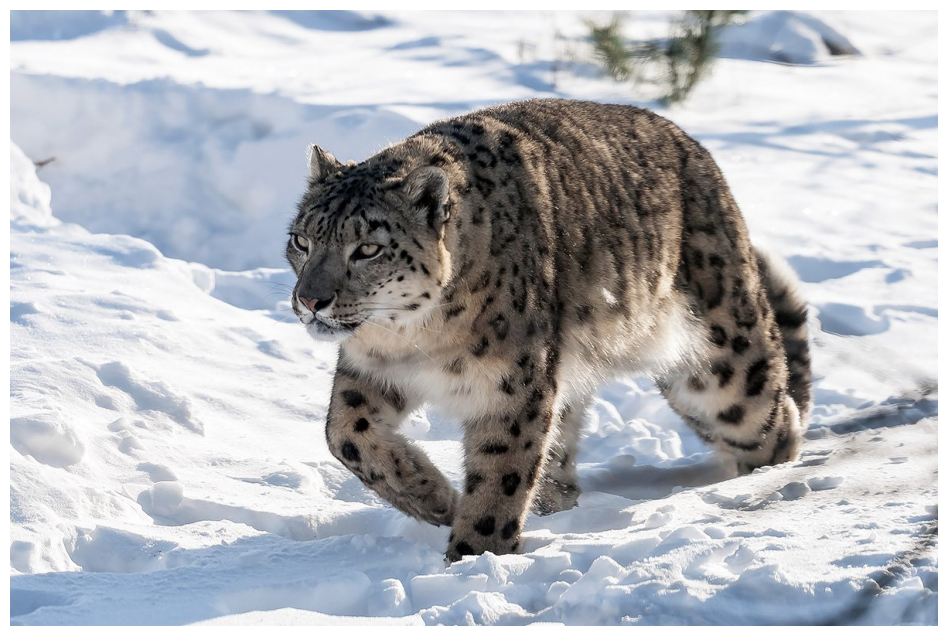

In [3]:
# функция, переводящая сссылку в картинку
def url_to_image(url):
    image = imageio.imread(url)
    return image

img = url_to_image('https://pic.rutubelist.ru/video/53/40/5340e2e9f645520574942fee3c229612.jpg')

plt.figure(figsize = (12, 8))
plt.imshow(img)
plt.axis("off");

Красивый снежный барс! 😈

In [4]:
img.shape

(797, 1200, 3)

#### Вопрос

Напомните, что означают цифры из метода `shape` выше? Почему они такие?

#### Пояснение

Каждая картинка — это набор пикселей или матрица из чисел. Каждому пикселю в этой матрице соответствует число. Это число сообщает нам о том насколько этот пиксель яркий. Яркость измеряется по шкале от 0 до 255.

Цветные картинки представляются в виде тензора, то есть матрицы из матриц (трехмерного объекта). Любой цвет можно получить, смешав в какой-то пропорции красный, зелёный и синий цвета. Поэтому каждый пиксель обычно характеризуют тремя цифрами: насколько пиксель красный, насколько пиксель зелёный, насколько пиксель синий. Такой формат хранения картинки называется RGB-форматом.

Например, ниже представлены 49 верхних левых пикселей, закодированных RGB и взятых по шкале Red:

In [5]:
img[:7, :7, 0]

array([[180, 179, 179, 178, 175, 173, 171],
       [180, 179, 179, 178, 174, 173, 170],
       [180, 180, 177, 176, 174, 172, 170],
       [180, 180, 177, 176, 174, 172, 169],
       [179, 178, 178, 177, 174, 172, 170],
       [177, 177, 177, 175, 174, 172, 170],
       [174, 174, 174, 174, 173, 171, 170]], dtype=uint8)

## Операция свёртки

Свёртка — это операция, которая превращает набор одних пикселей в другие. Она осуществляется с помощью ядра свёртки, матрицы произвольного размера (обычно квадратной).

Работает свёртка так: при вычислении нового значения выбранного пикселя изображения, ядро свёртки прикладывается своим центром к этому пикселю. Далее, вычисляется сумма произведений значений пикселей изображения на значения, накрывшего данный пиксель элемента ядра. Полученная сумма и является новым значением выбранного пикселя.




Используя ядра с различными коэффициентами, можно получать самые разные эффекты.

Попробуем ухудшить качество изображения. В этом нам поможет следующее ядро размера 3 на 3.



$$ K = \frac{1}{9} \cdot \begin{pmatrix}
1 & 1 & 1  \\
1 & 1 & 1  \\         
1 & 1 & 1
\end{pmatrix} $$



Данное ядро берёт пиксель в каждом квадрате размера 3 на 3 и заменяет его на арифмитическое среднее всех пикселей. Таким образом, размерность картинки и её качество падают.

Проверим!

In [6]:
img = url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg')

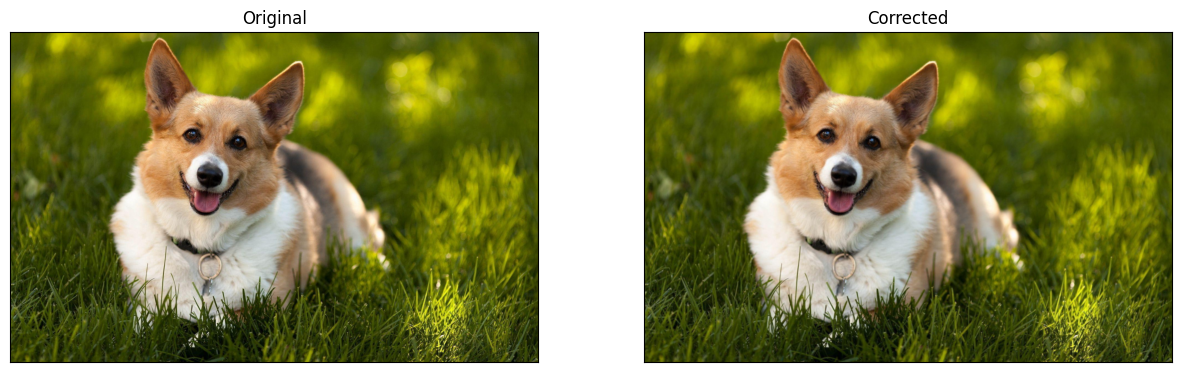

In [7]:
plt.figure(figsize=(15, 12))

kernel = np.ones((3, 3), np.float32) / 9
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(dst), plt.title('Corrected')
plt.xticks([]), plt.yticks([]);

Может быть, если эффект не очень заметен, стоит попробовать увеличить ядро по размеру.

А вот и другое ядро — ядро для увеличения чёткости. Обратите внимание на большое значение центрального элемента.



$$ \begin{pmatrix}
-0.1 & -0.1 & -0.1  \\
-0.1 & 2 & -0.1 \\         
-0.1 & -0.1 & -0.1
\end{pmatrix} $$

Попробуем его!

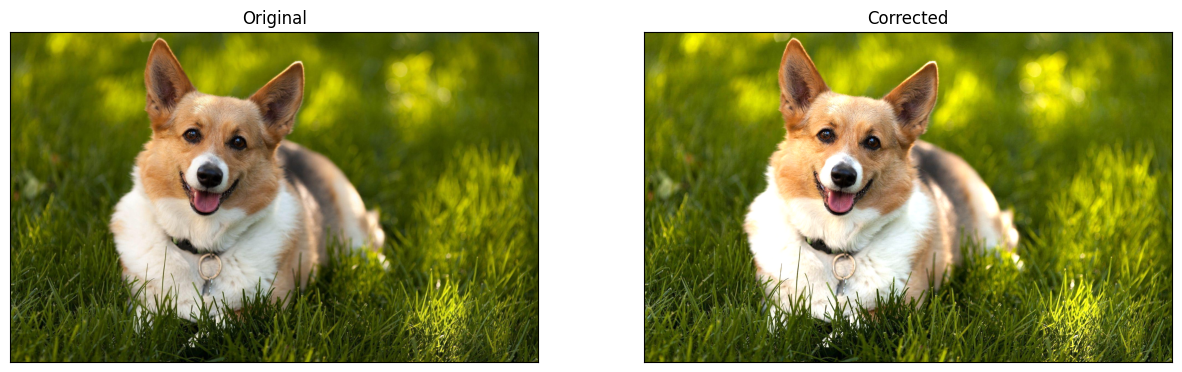

In [8]:
plt.figure(figsize=(15, 12))

kernel = -0.1 * np.ones((3, 3), np.float32)
kernel[1, 1] = 2
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img, ), plt.title('Original')
plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(dst), plt.title('Corrected')
plt.xticks([]), plt.yticks([]);

Опять-таки, если не очень видно — увеличиваем размер ядра!

А еще — попробуйте поиграться с центральным числом и увеличить его, скажем, до 4... :)

Так называемое emboss-ядро создаёт очень интересный эффект:



$$ \begin{pmatrix}
-2 & -1 & 0  \\
-1 & 1 & 1 \\         
0 & 1 & 2
\end{pmatrix} $$

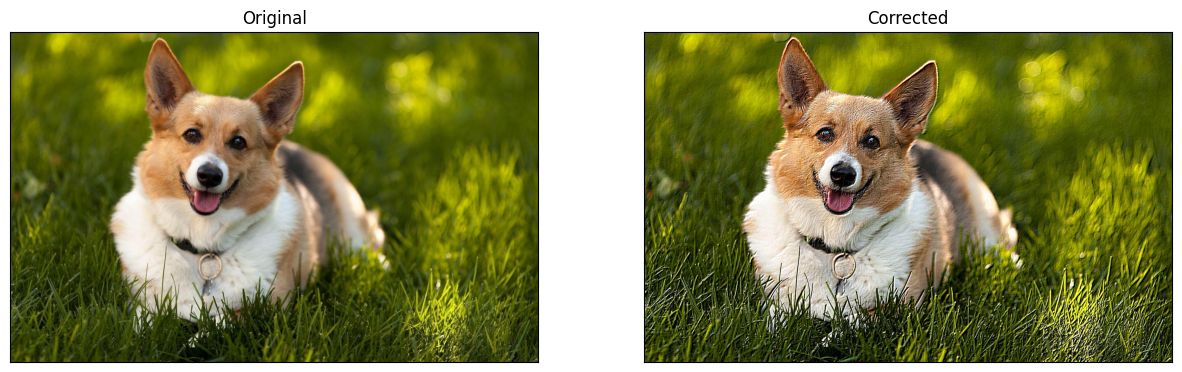

In [9]:
plt.figure(figsize=(15, 12))

kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img, ), plt.title('Original')
plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(dst), plt.title('Corrected')
plt.xticks([]), plt.yticks([]);

Выглядит очень свежо!

А теперь ещё одно ядро:

$$ \begin{pmatrix}
0 & 0 & 0  \\
0 & 1 & 0 \\         
0 & 0 & 0
\end{pmatrix} $$

#### Вопрос

Как вы думаете, что делает такое ядро?

#### Пояснение

Это identity-фильтр — он вернет то же самое изображение!

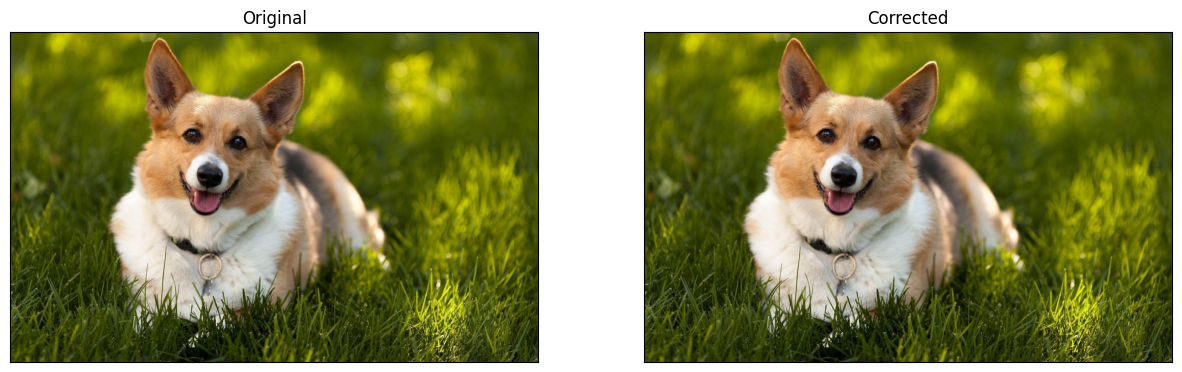

In [10]:
plt.figure(figsize=(15, 12))

kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img, ), plt.title('Original')
plt.xticks([]), plt.yticks([]);
plt.subplot(122), plt.imshow(dst), plt.title('Corrected')
plt.xticks([]), plt.yticks([]);

Перед нами два новых фильтра:



$$ \begin{pmatrix}
1 & 2 & 1  \\
0 & 0 & 0 \\         
-1 & -2 & -1
\end{pmatrix}  $$

$$ \begin{pmatrix}
-1 & 0 & 1  \\
-2 & 0 & 2 \\         
-1 & 0 & 1
\end{pmatrix} $$



Первый фильтр определяет, насколько резко изменяется картинка по горизонтали, и находит горизонтальные границы. Второй фильтр определяет, насколько резко изменяется яркость картинки по вертикали, и находит вертикальные границы. Если просуммировать применение этих фильтров, можно получить чёткое очертание границ картинки. Чем больше в матрицах цифры, тем более резкую разницу находят ядра.

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

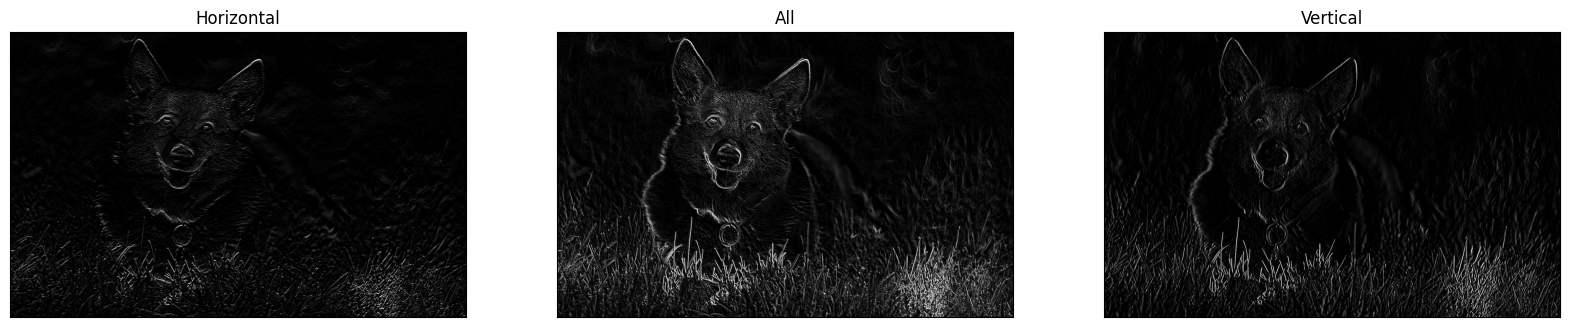

In [12]:
plt.figure(figsize=(20, 20))

kernel1 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
kernel2 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)

dst1 = cv2.filter2D(img_gray, -1, kernel1)
dst2 = cv2.filter2D(img_gray, -1, kernel2)
gr1 = cv2.add(dst1, dst2)

plt.subplot(131), plt.imshow(dst1, cmap="gray"), plt.title('Horizontal')
plt.xticks([]), plt.yticks([]);
plt.subplot(132), plt.imshow(gr1, cmap="gray"), plt.title('All')
plt.xticks([]), plt.yticks([]);
plt.subplot(133), plt.imshow(dst2, cmap="gray"), plt.title('Vertical')
plt.xticks([]), plt.yticks([]);

Испробовать различные фильтры самостоятельно вы можете на сайте: http://setosa.io/ev/image-kernels. Помогает досканально разобраться в том, как это всё работает.  

## Сверточная нейронная сеть

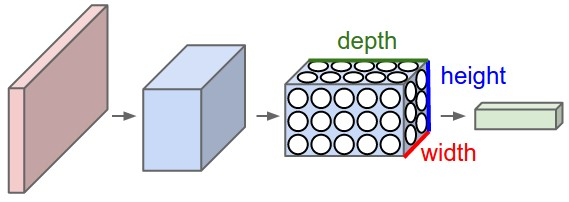

Свёрточная нейросеть (Convolutional Neural Network, CNN) — это многослойная нейросеть, имеющая в своей архитектуре помимо полносвязных слоёв (а иногда их может и не быть вовсе) ещё и свёрточные слои (Conv Layers) и pooling-слои (Pool Layers).  

Вот так устроена типичная неглубокая свёрточная нейросеть:

`Input -> Conv 5x5 -> Pool 2x2 -> Conv 5x5 -> Pool 2x2 -> FC -> Output`



В целом, свёрточные нейросети почти всегда строятся по следующему правилу:  

`INPUT -> [[CONV -> RELU]*N -> POOL]*M -> [FC -> RELU]*K -> FC`  

1) Входной слой (batch из картинок `H x W x C`)  

2) $M$ блоков из $N$ свёрток и pooling-ов, причём именно в таком порядке, как в формуле выше. Все эти $M$ блоков вместе называют feature extractor свёрточной нейросети, потому что эта часть сети отвечает непосредственно за формирование новых, более сложных признаков, поверх тех, которые подаются.   

3) $K$ штук Fully-Connected-слоёв (с активациями). Эту часть из $K$ полносвязных слоёв называют classificator, поскольку эти слои отвечают непосредственно за предсказание нужного класса.


Ещё раз вспомним про основные компоненты нейросети с прошлого семинара:

- сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой).



Но поскольку мы сейчас рассматриваем CNN, то, помимо этих компонент, — а вернее, в рамках пункта про архитектуру, — в свёрточной нейросети можно дополнительно настроить ещё следующие параметры:  

- в каждом ConvLayer:
  - **размер фильтров (окна свёртки)** (`kernel_size`)
  - **количество фильтров** (`out_channels`)  
  - **шаг окна свёртки (stride)** (`stride`)  
  - **тип padding'а** (`padding`)  


- в каждом PoolLayer:
  - **размер окна pooling'a** (`kernel_size`)  
  - **шаг окна pooling'а (stride)** (`stride`)  
  - **тип pooling'а** (`pool_type`)  
  - **тип padding'а** (`padding`)

### Датасеты

Давайте посмотрим, как будет работать CNN на реальных данных. Для этого воспользуемся широко распространенными датасетами MNIST (знакомый нам) и CIFAR10.

Датасет MNIST — это набор из 70 тысяч картинок рукописных цифр от 0 до 9, написанных людьми, 60 тысяч из которых являются тренировочной выборкой (train dataset) и ещё 10 тысяч — тестовой (test dataset).

<img src="http://present5.com/presentation/20143288_415358496/image-8.jpg" width=500>

Датасет CIFAR10 — это набор из 60 тысяч картинок `32 х 32 х 3`, 50 тысяч которых составляют обучающую выборку, и оставшиеся 10 тысяч — тестовую.

Классов в этом датасете 10 — все они представлены на картинке ниже.

<img src="https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png" width=500>

### CNN на MNIST

Ну что же, начнем довольно-таки продолжительную подготовку библиотек с целью реализовать нашу первую сверточную сеть для датасета MNIST.

In [13]:
# Установим последнюю версию логера wandb
!pip install -q --upgrade wandb

In [14]:
import os
import wandb

import numpy as np
import random
from tqdm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

import matplotlib.pyplot as plt
%matplotlib inline

[INFO] Couldn't find torchinfo... installing it.


In [15]:
# Зафиксируем seed для воспроизводимости

def seed_everything(seed):
    random.seed(seed) # фиксируем генератор случайных чисел
    os.environ['PYTHONHASHSEED'] = str(seed) # фиксируем заполнения хешей
    np.random.seed(seed) # фиксируем генератор случайных чисел numpy
    torch.manual_seed(seed) # фиксируем генератор случайных чисел pytorch
    torch.cuda.manual_seed(seed) # фиксируем генератор случайных чисел для GPU
    torch.backends.cudnn.deterministic = True # выбираем только детерминированные алгоритмы (для сверток)
    torch.backends.cudnn.benchmark = False # фиксируем алгоритм вычисления сверток

In [16]:
class CFG:

# Задаем параметры нашего эксперимента

  api = ""
  project = "MNIST_CIFAR_convolution"
  entity = ""
  num_epochs = 10
  train_batch_size = 32
  test_batch_size = 512
  num_workers = 2
  lr = 3e-4
  seed = 42
  classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  wandb = False

In [17]:
# Переведем наш класс с параметрами в словарь

def class2dict(f):
  return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

Построим нашу первую сверточную сеть — LeNet5 (привет, Ян Лекун!)

In [18]:
class LeNet5(torch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5
                ):
        super(LeNet5, self).__init__()

        self.conv_size = conv_size

        # установим на выбор функции активации
        if activation == 'tanh':
            activation_function = torch.nn.Tanh()
        elif activation == 'relu':
            activation_function  = torch.nn.ReLU()
        else:
            raise NotImplementedError

        # установим на выбор тип пулинга
        if pooling == 'avg':
            pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError

        # установим на выбор размер ядра 1 слоя
        if conv_size == 5:
            self.conv1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=5, padding=2)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=3, padding=1)
            self.conv1_2 = torch.nn.Conv2d(
                in_channels=6, out_channels=6, kernel_size=3, padding=1)
        else:
            raise NotImplementedError

        self.act1 = activation_function
        self.pool1 = pooling_layer

        # установим на выбор размер ядра 2 слоя
        if conv_size == 5:
            self.conv2 = self.conv2 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = torch.nn.Conv2d(
                in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function
        self.pool2 = pooling_layer

        # не забываем про полносвязанные слои
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = activation_function

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = activation_function

        self.fc3 = torch.nn.Linear(84, 10)

    # прямой проход
    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        x = self.pool1(x)

        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

In [19]:
# функция обучения
def train(model, device, train_loader, optimizer, criterion, epoch, WANDB):
    model.train()
    train_loss = 0
    correct = 0

    n_ex = len(train_loader)

    for batch_idx, (data, target) in tqdm(enumerate(train_loader), total=n_ex):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # обнуляем градиенты
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        train_loss = criterion(output, target) # считаем лосс
        train_loss.backward() # обратный проход
        optimizer.step() # делаем шаг оптимизатором

    tqdm.write('\nTrain set: Average loss: {:.4f}, Accuracy: {:.2f}%'.format(
        train_loss, 100. * correct / len(train_loader.dataset)))

    # логируем функцию потерь и точность
    if WANDB:
        wandb.log({'train_loss': train_loss,
                   'train_accuracy': correct / len(train_loader.dataset)})

In [20]:
# функция инференса
def test(model, device, test_loader, criterion, WANDB):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    tqdm.write('Test set: Average loss: {:.4f}, Accuracy: {:.2f}%'.format(
        test_loss, 100. * correct / len(test_loader.dataset)))

    if WANDB:
        wandb.log({'test_loss': test_loss,
                   'test_accuracy': correct / len(test_loader.dataset)})

In [21]:
def main_MNIST(model):

    if CFG.wandb:
        os.environ["WANDB_API_KEY"] = CFG.api
        wandb.init(project=CFG.project, entity=CFG.entity, reinit=True, config=class2dict(CFG))

    use_cuda = torch.cuda.is_available()

    seed_everything(CFG.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': CFG.num_workers, 'pin_memory': True} if use_cuda else {}

    # загружаем датасет MNIST
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,)) # значения среднего и стандартного отклонения
                       ])),
        batch_size=CFG.train_batch_size, shuffle=True, **kwargs)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=CFG.test_batch_size, shuffle=False, **kwargs)

    model = model.to(device)


    if CFG.wandb:
        wandb.watch(model, log='all')

    optimizer = optim.Adam(model.parameters(),
                          lr=CFG.lr)

    criterion = nn.CrossEntropyLoss()

    for epoch in range(1, CFG.num_epochs + 1):
        print('\nEpoch:', epoch)
        train(model, device, train_loader, optimizer, criterion, epoch, CFG.wandb)
        test(model, device, test_loader, criterion, CFG.wandb)
    print('Training is ended!')

Итак, мы готовы!

Будем сравнивать модели:

In [22]:
model_1 = LeNet5(activation='tanh', conv_size=5)
model_2 = LeNet5(activation='relu', conv_size=5)
model_3 = LeNet5(activation='relu', conv_size=3)
model_4 = LeNet5(activation='relu', conv_size=3, pooling='max')

In [23]:
# Вывод информации о модели с помощью torchinfo
summary(model=model_4,
        input_size=(32, 1, 28, 28), # входной батч
        col_names=["input_size", "output_size", "num_params", "trainable"], # что хотим посмотреть
        col_width=20
)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
LeNet5                                   [32, 1, 28, 28]      [32, 10]             --                   True
├─Conv2d: 1-1                            [32, 1, 28, 28]      [32, 6, 28, 28]      60                   True
├─Conv2d: 1-2                            [32, 6, 28, 28]      [32, 6, 28, 28]      330                  True
├─ReLU: 1-3                              [32, 6, 28, 28]      [32, 6, 28, 28]      --                   --
├─MaxPool2d: 1-4                         [32, 6, 28, 28]      [32, 6, 14, 14]      --                   --
├─Conv2d: 1-5                            [32, 6, 14, 14]      [32, 16, 12, 12]     880                  True
├─Conv2d: 1-6                            [32, 16, 12, 12]     [32, 16, 10, 10]     2,320                True
├─ReLU: 1-7                              [32, 16, 10, 10]     [32, 16, 10, 10]     --                   --
├─MaxPool2d: 1-8    

Запускаем обучение сети! Когда завершится, сравните качество с тем, что мы видели на прошлом семинаре в полносвязных! :)

In [24]:
main_MNIST(model_4)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.92MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.52MB/s]


Epoch: 1



100%|██████████| 1875/1875 [00:19<00:00, 96.66it/s] 


Train set: Average loss: 0.0754, Accuracy: 92.81%


Test set: Average loss: 0.1736, Accuracy: 97.30%

Epoch: 2


100%|██████████| 1875/1875 [00:19<00:00, 93.85it/s] 


Train set: Average loss: 0.0087, Accuracy: 97.61%


Test set: Average loss: 0.1332, Accuracy: 98.07%

Epoch: 3


100%|██████████| 1875/1875 [00:20<00:00, 89.49it/s]


Train set: Average loss: 0.0312, Accuracy: 98.27%


Test set: Average loss: 0.1256, Accuracy: 98.22%

Epoch: 4


100%|██████████| 1875/1875 [00:22<00:00, 83.69it/s]


Train set: Average loss: 0.0251, Accuracy: 98.63%


Test set: Average loss: 0.0586, Accuracy: 98.66%

Epoch: 5


100%|██████████| 1875/1875 [00:22<00:00, 82.03it/s]


Train set: Average loss: 0.0012, Accuracy: 98.89%


Test set: Average loss: 0.0575, Accuracy: 98.46%

Epoch: 6


100%|██████████| 1875/1875 [00:20<00:00, 92.89it/s]


Train set: Average loss: 0.0130, Accuracy: 99.09%


Test set: Average loss: 0.1119, Accuracy: 98.78%

Epoch: 7


100%|██████████| 1875/1875 [00:22<00:00, 83.12it/s] 


Train set: Average loss: 0.0074, Accuracy: 99.22%


Test set: Average loss: 0.0868, Accuracy: 98.78%

Epoch: 8


100%|██████████| 1875/1875 [00:19<00:00, 96.58it/s] 


Train set: Average loss: 0.0131, Accuracy: 99.32%


Test set: Average loss: 0.0395, Accuracy: 99.05%

Epoch: 9


100%|██████████| 1875/1875 [00:21<00:00, 87.61it/s] 


Train set: Average loss: 0.0009, Accuracy: 99.44%


Test set: Average loss: 0.0393, Accuracy: 98.74%

Epoch: 10


100%|██████████| 1875/1875 [00:22<00:00, 81.55it/s]


Train set: Average loss: 0.0003, Accuracy: 99.48%


Test set: Average loss: 0.0752, Accuracy: 98.97%
Training is end!


Итак, мы обучили одну модель. Но ведь у нас были и другие! Какие можно сделать выводы, если сравнивать качество их работы между собой? Попробуйте самостоятельно!

### CNN и перцептрон сражаются на CIFAR

Ну что же, а теперь давайте устроим настоящий поединок между полносвязанной сетью и сверточной на датасете CIFAR10.

In [25]:
def main_CIFAR(model):

    if CFG.wandb:
        os.environ["WANDB_API_KEY"] = CFG.api
        wandb.init(project=CFG.project, entity=CFG.entity, reinit=True, config=class2dict(CFG))

    use_cuda = torch.cuda.is_available()

    seed_everything(CFG.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': CFG.num_workers, 'pin_memory': True} if use_cuda else {}

    # загружаем датасет CIFAR10
    train_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)) # нормализуем значения
                       ])),
        batch_size=CFG.train_batch_size, shuffle=True, **kwargs)

    test_loader = torch.utils.data.DataLoader(
        datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                       ])),
        batch_size=CFG.test_batch_size, shuffle=False, **kwargs)

    model = model.to(device)


    if CFG.wandb:
        wandb.watch(model, log='all')

    optimizer = optim.Adam(model.parameters(),
                          lr=CFG.lr)

    criterion = nn.CrossEntropyLoss()

    for epoch in range(1, CFG.num_epochs + 1):
        print('\nEpoch:', epoch)
        train(model, device, train_loader, optimizer, criterion, epoch, CFG.wandb)
        test(model, device, test_loader, criterion, CFG.wandb)
    print('Training is ended!')

Мы пока еще ничего не знаем об инициализации весов. Но все равно давайте попробуем сделать "красиво".

In [26]:
# определяем полносвязанную сеть
class FC_Net(nn.Module):
    def __init__(self, constant_weight=None, normal=False,
                 xavier_uniform=False, he_normal=False):
        super(FC_Net, self).__init__()

        self.fc1 = nn.Linear(3072, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 10)

        # инициализируем по-разному веса
        if(constant_weight is not None):
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.constant_(m.weight, constant_weight)
                    nn.init.constant_(m.bias, 0)

        if normal:
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.normal_(m.weight)
                    nn.init.constant_(m.bias, 0)

        if xavier_uniform:
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.xavier_uniform_(m.weight)
                    nn.init.constant_(m.bias, 0)

        if he_normal:
            for m in self.modules():
                if isinstance(m, nn.Linear):
                    nn.init.kaiming_uniform_(m.weight)
                    nn.init.constant_(m.bias, 0)


    def forward(self, x):
        x = x.view(-1, 3072)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [27]:
model_1 = FC_Net(constant_weight=0) # все нули
model_2 = FC_Net(constant_weight=10) # константы
model_3 = FC_Net(normal=True) # нормальное распределение
model_4 = FC_Net(xavier_uniform=True) # Ксавье-инициализация
model_5 = FC_Net(he_normal=True) # He-инициализация

In [28]:
main_CIFAR(model_4)

100%|██████████| 170M/170M [00:03<00:00, 42.7MB/s]



Epoch: 1


100%|██████████| 1563/1563 [00:17<00:00, 90.07it/s]


Train set: Average loss: 1.7223, Accuracy: 40.42%


Test set: Average loss: 1.5703, Accuracy: 45.58%

Epoch: 2


100%|██████████| 1563/1563 [00:17<00:00, 87.70it/s]


Train set: Average loss: 1.3196, Accuracy: 48.36%


Test set: Average loss: 1.5797, Accuracy: 48.06%

Epoch: 3


100%|██████████| 1563/1563 [00:19<00:00, 80.13it/s]


Train set: Average loss: 1.3196, Accuracy: 52.46%


Test set: Average loss: 1.5298, Accuracy: 49.37%

Epoch: 4


100%|██████████| 1563/1563 [00:17<00:00, 88.31it/s]


Train set: Average loss: 0.9343, Accuracy: 56.00%


Test set: Average loss: 1.4834, Accuracy: 50.22%

Epoch: 5


100%|██████████| 1563/1563 [00:18<00:00, 82.43it/s] 


Train set: Average loss: 1.5571, Accuracy: 59.49%


Test set: Average loss: 1.5283, Accuracy: 51.80%

Epoch: 6


100%|██████████| 1563/1563 [00:17<00:00, 91.68it/s]


Train set: Average loss: 1.0490, Accuracy: 63.08%


Test set: Average loss: 1.5918, Accuracy: 52.48%

Epoch: 7


100%|██████████| 1563/1563 [00:18<00:00, 85.20it/s]


Train set: Average loss: 0.9509, Accuracy: 66.41%


Test set: Average loss: 1.6177, Accuracy: 53.46%

Epoch: 8


100%|██████████| 1563/1563 [00:18<00:00, 86.83it/s]


Train set: Average loss: 0.7718, Accuracy: 69.61%


Test set: Average loss: 1.6176, Accuracy: 53.64%

Epoch: 9


100%|██████████| 1563/1563 [00:18<00:00, 85.72it/s]


Train set: Average loss: 1.3790, Accuracy: 72.59%


Test set: Average loss: 1.8253, Accuracy: 53.19%

Epoch: 10


100%|██████████| 1563/1563 [00:20<00:00, 76.73it/s]


Train set: Average loss: 0.3850, Accuracy: 75.78%


Test set: Average loss: 1.8327, Accuracy: 53.42%
Training is end!


#### Вопрос

После обучения одной модели, какие выводы вы можете сделать, в особенности сравнивая результаты на train и test?

Кроме того, обратите внимание, запустив обучение разных моделей выше, насколько инициализация весов важна для успешного обучения сети. Наглядно увидеть, как от инициализации весов зависит протекание градиентов можно тут https://www.deeplearning.ai/ai-notes/initialization/index.html  

Время для свёртки!

In [29]:
# создаем сверточную сеть для CIFAR10
class CIFAR_Net(torch.nn.Module):
    def __init__(self):
        super(CIFAR_Net, self).__init__()

        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(2, 2)

        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(2, 2)

        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()

        self.fc1   = torch.nn.Linear(8 * 8 * 64, 256)
        self.act4  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.act3(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.fc3(x)

        return x

In [30]:
model_CNN = CIFAR_Net()

In [31]:
summary(model=model_CNN,
        input_size=(32, 3, 32, 32), # входной батч
        col_names=["input_size", "output_size", "num_params", "trainable"], # что хотим посмотреть
        col_width=20
)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
CIFAR_Net                                [32, 3, 32, 32]      [32, 10]             --                   True
├─Conv2d: 1-1                            [32, 3, 32, 32]      [32, 16, 32, 32]     448                  True
├─ReLU: 1-2                              [32, 16, 32, 32]     [32, 16, 32, 32]     --                   --
├─MaxPool2d: 1-3                         [32, 16, 32, 32]     [32, 16, 16, 16]     --                   --
├─Conv2d: 1-4                            [32, 16, 16, 16]     [32, 32, 16, 16]     4,640                True
├─ReLU: 1-5                              [32, 32, 16, 16]     [32, 32, 16, 16]     --                   --
├─MaxPool2d: 1-6                         [32, 32, 16, 16]     [32, 32, 8, 8]       --                   --
├─Conv2d: 1-7                            [32, 32, 8, 8]       [32, 64, 8, 8]       18,496               True
├─ReLU: 1-8           

In [32]:
main_CIFAR(model_CNN)


Epoch: 1


100%|██████████| 1563/1563 [00:18<00:00, 86.32it/s]


Train set: Average loss: 1.4778, Accuracy: 48.42%


Test set: Average loss: 1.2565, Accuracy: 58.10%

Epoch: 2


100%|██████████| 1563/1563 [00:18<00:00, 85.55it/s]


Train set: Average loss: 1.0949, Accuracy: 62.40%


Test set: Average loss: 1.1315, Accuracy: 64.17%

Epoch: 3


100%|██████████| 1563/1563 [00:18<00:00, 84.48it/s]


Train set: Average loss: 0.8194, Accuracy: 68.57%


Test set: Average loss: 1.0265, Accuracy: 67.17%

Epoch: 4


100%|██████████| 1563/1563 [00:19<00:00, 79.18it/s]


Train set: Average loss: 0.5225, Accuracy: 72.49%


Test set: Average loss: 1.0097, Accuracy: 70.06%

Epoch: 5


100%|██████████| 1563/1563 [00:22<00:00, 69.54it/s]


Train set: Average loss: 0.8044, Accuracy: 76.03%


Test set: Average loss: 0.9834, Accuracy: 71.56%

Epoch: 6


100%|██████████| 1563/1563 [00:20<00:00, 77.69it/s]


Train set: Average loss: 0.3868, Accuracy: 79.33%


Test set: Average loss: 0.9691, Accuracy: 71.93%

Epoch: 7


100%|██████████| 1563/1563 [00:19<00:00, 78.83it/s]


Train set: Average loss: 0.5969, Accuracy: 82.77%


Test set: Average loss: 0.9565, Accuracy: 71.76%

Epoch: 8


100%|██████████| 1563/1563 [00:18<00:00, 84.32it/s]


Train set: Average loss: 0.6297, Accuracy: 85.89%


Test set: Average loss: 0.9744, Accuracy: 72.04%

Epoch: 9


100%|██████████| 1563/1563 [00:19<00:00, 79.89it/s]


Train set: Average loss: 0.4270, Accuracy: 89.25%


Test set: Average loss: 0.9561, Accuracy: 72.64%

Epoch: 10


100%|██████████| 1563/1563 [00:21<00:00, 73.92it/s]


Train set: Average loss: 0.2147, Accuracy: 92.40%


Test set: Average loss: 1.0221, Accuracy: 72.89%
Training is end!


Итак, несмотря на неидеальные результаты, приходится признать очевидный факт: сверточные сети гораздо лучше решают задачу классификации изображений, нежели полносвязные. Дальнейший пласт работы, связанный с тем, чтобы побороть переобучение и улучшить качество предсказаний, — лишь впереди!

#### Теоретическое задание

Предложите ваши модификации к архитектуре свёрточной нейронной сети выше, чтобы улучшить качество предсказаний на CIFAR. Попробуем реализовать их вместе прямо в ноутбуке!